# **Tratamiento Inteligente de Datos**
# Práctica Inidividual - Árbol de decisión

Óscar Moreira Estévez 

3º Grado en Ingeniería Informática - Itinerario de Computación

<br>
____

# Descripción de la práctica

En esta práctica a partir de un fichero *seeds.txt* en el que se nos dan 210 semillas de trigo con 3 tipos diferentes como son Kama, Rosa y Canadiense, creamos un programa que sea capaz de clasificarlas usando un *árbol de decisión*.

# 1. Fichero y librerías necesarias

## 1.1 Fichero Necesario

- **seeds.txt :** Fichero con el que se trabajará en esta práctica
- Se puede descargar desde este [enlace fichero](https://raw.githubusercontent.com/omorest/SeedsPredictionsTID/master/seeds.txt)

## 1.2 Liberías Necesarias

- **Pandas :** Proceso de tratar los datos como leer el dataframe, modificarlos, acceder a ellos, etc...
- **Sklearn :** librería para machine learning en la que podremos crear *árboles de decisión*, entrenar el modelo, etc...
- **Graphviz :**  Librería para poder mostrar el árbol de decisión

## 2. Instalación de paquetes



In [0]:
pip install pandas sklearn graphviz


___

<br>

# 3. Comienzo de la práctica

## 3.1 Creación del Dataframe

Importamos la librerías **pandas** con la que leeremos el fichero y creamos nuestro dataframe

In [0]:
import pandas as pd

In [0]:
dataframe_file = 'seeds.txt' 

# Leemos el fichero y le introducimos los nombres de las columnas que tendremos

dataframe = pd.read_csv(dataframe_file, delimiter="\s+", names=['area', 'perimeter','compactibility', 'nucleus_length', 'nucleus_width', 'asymmetry_coefficient', 'groove_length', 'seed_type'])

In [670]:
#Visualizamos el dataframe

dataframe

,area,perimeter,compactibility,nucleus_length,nucleus_width,asymmetry_coefficient,groove_length,seed_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


> ### NOTA
> Podemos ver los tipos de semilla que tenemos en todo el dataframe y también ver cuantos hay de cada tipo 

In [671]:
# Tipos de semillas

dataframe['seed_type'].unique()

array([1, 2, 3])

In [672]:
# Cantidad de semillas por cada tipo de ellas
dataframe['seed_type'].value_counts()

3    70
2    70
1    70
Name: seed_type, dtype: int64


___

<br>

## 3.2 Datos de descriptivos y datos objetivo.

- **Descriptivos (data) :** Usaremos el mismo dataframe pero sin la última columna ya que es la que queremos predecir.

- **Objetivo (target) :** Usaremos solo la última columna del dataframe


In [0]:
# Eliminación de la ultima columna para crear el dataframe de los datos descriptivos

data = seeds_dataframe.drop('seed_type', axis=1)

In [674]:
data

,area,perimeter,compactibility,nucleus_length,nucleus_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [0]:
# Escogemos la última columna de dataframe como objetivos que serán los tipos de semilla que tendremos

target = dataframe['seed_type']

In [676]:
target

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: seed_type, Length: 210, dtype: int64


___

<br>

## 3.3 Creación del árbol de decisión<a name="3.3"></a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<br>

## 3.3.1 Porcentajes aleatorios para los datos <a name="3.1"></a>

Le datemos un porcetaje tanto a los datos de entrenamiento como a los datos de validación de tal forma que será aleatoriamente siempre que se ejecute cogiendo datos diferentes.

- *data_train , target_train = 70%*
- *data_test, target_train = 30%*

In [0]:
# Indicamos el porcentaje que tendrán los datos de entrenamiento y los datos de validación

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)

## 3.3.2 Clasificación del árbol 

Indicaciones para la clasificación del árbol:

- **max_depth :** máximo de profundidad del árbol
- **min_samples_leaf :** cada nodo hoja debe tener al menos N cantidad de datos
- **min_samples_split :** cada nodo tiene que tener mínimo N datos para poder dividirlo

In [0]:
# Datos para clasificar el árbol

model_tree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=10)

## 3.3.3 Entrenamiento del árbol de decisión

Entrenaremos el árbol con los datos de entrenamiento para luego usar este árbol ya entrenado con los datos de validación

In [0]:
# Entrenamos el árbol con los datos de entrenamiento

model_tree = model_tree.fit(data_train, target_train)

In [0]:
from sklearn import tree
import graphviz

## 3.3.4 Mostar árbol de decisión <a name="3.3.4"></a>

In [0]:
dot_seed = tree.export_graphviz(model_tree, out_file=None,
                                feature_names=data.columns,
                                filled=True)

graph = graphviz.Source(dot_seed)

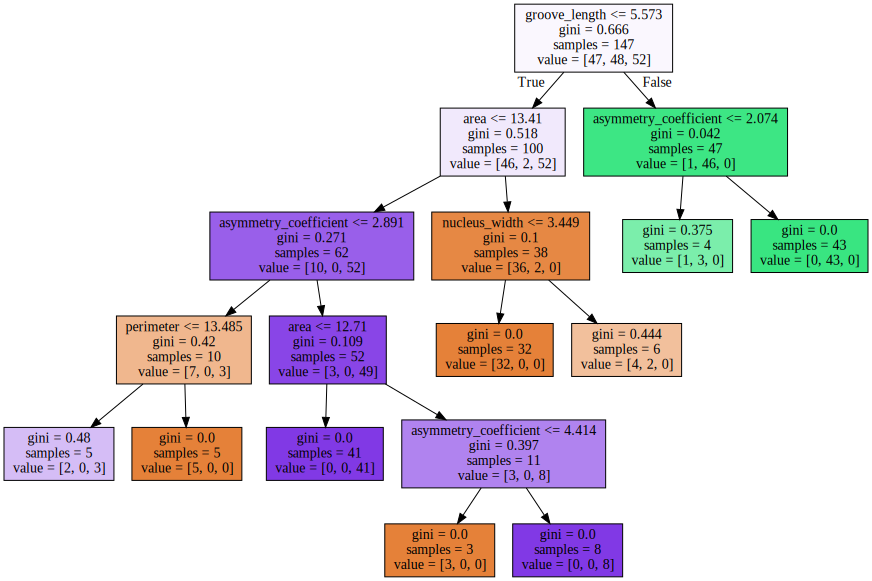

In [683]:
graph


___

<br>

## 3.4 Predicciones

En este apartado sacaremos las precisiones que hemos conseguido tanto con el conjunto de validacion como el de entrenamiento y veremos también la *matriz de confusión*

## 3.4.1  Predicción sobre conjunto de validación

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
# Predecimos los datos objetivos con el árbol creado anterioremente

predictions_test = model_tree.predict(data_test)

<br>

### Precisión <a name="precision_test"></a>

In [688]:
print(classification_report(target_test, predictions_test))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        23
           2       1.00      1.00      1.00        22
           3       0.86      1.00      0.92        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.96      0.95      0.95        63



## Matriz de Confusión <a name="confusión_test"></a>

In [689]:
print(confusion_matrix(target_test, predictions_test))

[[20  0  3]
 [ 0 22  0]
 [ 0  0 18]]



___

<br>

## 3.4.2 Predicciones sobre conjunto de entrenamiento

In [0]:
predictions_train = model_tree.predict(data_train)

### Precisión <a name="precision_train"></a>

In [693]:
print(classification_report(target_train, predictions_train))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95        47
           2       0.98      0.96      0.97        48
           3       0.96      1.00      0.98        52

    accuracy                           0.97       147
   macro avg       0.97      0.96      0.97       147
weighted avg       0.97      0.97      0.97       147



### Matriz de Confusión <a name="confusion_train"></a>

In [694]:
print(confusion_matrix(target_train, predictions_train))

[[44  1  2]
 [ 2 46  0]
 [ 0  0 52]]


___
___

<br>

# Preguntas


## **1.** Seleccionar aleatoriamente el 70% de los datos como conjunto de entrenamiento. Reservar el 30% restante como conjunto de validación.

- Respuesta en el siguiente apartado :

  - [3.1 Porcentaje aleatorio para los datos](#3.1)

___

<br>

## **2.** Obtener el árbol de clasificación usando el conjunto de entrenamiento.

- Respuesta en los siguientes apartados :

  - Código de la creación del árbol : [3.3 Creación árbol de decisión](#3.3)

  - Árbol dibujado : [3.3.4 Mostrar árbol de decisión](#3.3.4)

### **(a)** ¿Cuál es la precisión del árbol sobre el conjunto de validación? 

- Respuestas en el siguiente apartado:

  - [3.4.1 Precisión del conjunto de validación](#precision_test)

  - Podemos ver que tenemso una precisión perfecta con valor de 1 para las semillas de tipo 1 y 2 y un 0.86 para las de tipo 3.

### ¿Y sobre el conjunto de entrenamiento? 

- [3.4.1 Precisión del conjunto de entrenamiento](#precision_train)
- Podemos ver que tenemso una precisión casi perfecta con valor de 0.96 para las semillas de tipo 1 y 3 y un 0.98 para las de tipo 2.

### ¿Qué sugieren estos valores?

- Con estos valores podemos observar que el entrenamiento ha sido muy bueno ya que tenemos una gran precisión a la hora de clasificar las semillas con muy poco error teniendo casi una precisión de 1, aunque ya veremos en los siguiente apartados que tener una precisión de 1 no significa que siempre acierte


### **(b)** Sobre el conjunto de validación, ¿qué semillas clasifica mejor?, ¿cómo lo has deducido?

- En un principio se diría que tanto la semilla de tipo 1 y 2 (Kama y Rosa) se clasificarían de igual manera con uan precisión perfecta ya que nos da lo siguiente:

  - Precisión de la semilla Rosa en validación : 100%
  - Precisión de la semilla Kama en validación : 100%

- Pero si observamos la matriz de confusión podemos observar que las semillas de tipo Rosa las clasifica mejor ya que las de tipo Kama tiene falsos positivos en el que clasifico 3 semillas de tipo 3 (Canadiense) como tipo Kama al contrario de la semilla Rosa que ha tenido una clasificación perfecta. 


### **(c)** ¿Dónde hay más falsos positivos?

- En este caso ha sido la semilla 1 (Kama) ya que clasifico 3 semillas de tipo Canadiense como una de tipo Kama.

___

<br>

## **3.** ¿Emplea el árbol todos los atributos? Explica por qué descarta algunos atributos.

- No ya que el árbol se genera con los atributos que mejor clasifiquen los datos que tiene en el entrenamiento.
 
- Esto hace que árbol cambie cada vez que se ejecute ya que se crea con un conjunto aleatorio de datos y alomejor en otra ejecución con otros datos usa atributos que anteriormente no usó por que clasifica a estos datos de mejor manera con esos atributos